In [1]:
import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json 
import csv
from geopy.geocoders import Nominatim 
import geocoder
import requests 
from bs4 import BeautifulSoup 

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [4]:
data=requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Kolkata').text

In [5]:
dataframe=open('kol.csv','w')
csv_writer=csv.writer(dataframe)
csv_writer.writerow(["Neighbourhood"])
soup=BeautifulSoup(data,'lxml')
mcwg=soup.find_all(class_="mw-category-group")
length=len(mcwg)

In [6]:
mcwg[1]

<div class="mw-category-group"><h3>A</h3>
<ul><li><a href="/wiki/Abhirampur" title="Abhirampur">Abhirampur</a></li>
<li><a href="/wiki/Agarpara" title="Agarpara">Agarpara</a></li>
<li><a href="/wiki/Ajoy_Nagar" title="Ajoy Nagar">Ajoy Nagar</a></li>
<li><a href="/wiki/Alipore" title="Alipore">Alipore</a></li>
<li><a href="/wiki/Amodghata" title="Amodghata">Amodghata</a></li>
<li><a href="/wiki/Amtala" title="Amtala">Amtala</a></li>
<li><a href="/wiki/Anandapur,_Kolkata" title="Anandapur, Kolkata">Anandapur, Kolkata</a></li>
<li><a href="/wiki/Ankurhati" title="Ankurhati">Ankurhati</a></li>
<li><a href="/wiki/Argari" title="Argari">Argari</a></li>
<li><a href="/wiki/Asuti" title="Asuti">Asuti</a></li></ul></div>

In [7]:
for i in range(1,length):
    lists=mcwg[i].find_all('a')
    for j in lists:
        nbd=j.get('title')
        csv_writer.writerow([nbd])
dataframe.close()

In [2]:
df=pd.read_csv("kol.csv")

In [19]:
df=df.drop(139)

In [20]:
df.reset_index(drop=True)

,Neighbourhood,Latitude,Longitude
0,Abhirampur,22.530694,88.346503
1,Agarpara,22.684050,88.391650
2,Ajoy Nagar,22.489660,88.396400
3,Alipore,22.526600,88.335100
4,Amodghata,22.988010,88.388380
5,Amtala,22.482678,88.376588
6,"Anandapur, Kolkata",22.512078,88.336962
7,Ankurhati,22.476405,88.380441
8,Argari,22.570540,88.371240
9,Asuti,22.472170,88.255460


In [6]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{},Kolkata, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [9]:
coords = [ get_latlng(neighborhood) for neighborhood in df["Neighbourhood"].tolist() ]

In [10]:
coords

[[22.530693771856434, 88.34650250291418],
 [22.68405000000007, 88.39165000000008],
 [22.48966000000007, 88.39640000000009],
 [22.52660000000003, 88.33510000000007],
 [22.98801000000003, 88.38838000000004],
 [22.482678048848754, 88.37658799417164],
 [22.512078083819034, 88.336961916181],
 [22.47640513266778, 88.38044069608748],
 [22.57054000000005, 88.37124000000006],
 [22.472170000000062, 88.25546000000008],
 [22.567620000000034, 88.34456000000006],
 [22.56729000000007, 88.34106000000008],
 [22.555079999999997, 88.24685148658381],
 [22.604020000000048, 88.36638000000005],
 [22.48395000000005, 88.37543000000005],
 [22.61674000000005, 88.42691000000008],
 [22.472510000000057, 88.36513000000008],
 [22.700780000000066, 88.38065000000006],
 [22.497570000000053, 88.23033000000004],
 [22.647860000000037, 88.34428000000008],
 [22.647860000000037, 88.34428000000008],
 [22.531780000000026, 88.36437000000006],
 [22.5303523517102, 88.35621146045604],
 [22.36719000000005, 88.38320000000004],
 [22.7

In [11]:
coords=pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [12]:
coords.shape

(199, 2)

In [13]:
df["Latitude"]=coords["Latitude"]
df["Longitude"]=coords["Longitude"]

In [14]:
df

,Neighbourhood,Latitude,Longitude
0,Abhirampur,22.530694,88.346503
1,Agarpara,22.684050,88.391650
2,Ajoy Nagar,22.489660,88.396400
3,Alipore,22.526600,88.335100
4,Amodghata,22.988010,88.388380
5,Amtala,22.482678,88.376588
6,"Anandapur, Kolkata",22.512078,88.336962
7,Ankurhati,22.476405,88.380441
8,Argari,22.570540,88.371240
9,Asuti,22.472170,88.255460


In [21]:
df.to_csv('kol_coordinates.csv')

In [22]:
# get the coordinates of kolkata
address = 'Kolkata, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kolkata, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kolkata, India 22.54541245, 88.3567751581234.


In [23]:
map_kolkata = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kolkata)  
    
map_kolkata

In [24]:
map_kolkata.save('map_kolkata.html')

In [25]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [26]:
CLIENT_ID = 'E1GHDNTGVO3PHIZBDK5SSYI24BQMEMORYMUXLH5HASGFBU5F'# your Foursquare ID
CLIENT_SECRET = '21JMBEZEAFY0KARX03EE235D1FGCB2TBI3SKHIIPFQXZXDDR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E1GHDNTGVO3PHIZBDK5SSYI24BQMEMORYMUXLH5HASGFBU5F
CLIENT_SECRET:21JMBEZEAFY0KARX03EE235D1FGCB2TBI3SKHIIPFQXZXDDR


In [27]:
def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
explore_df_list = []

for i, nbd_name in enumerate(df['Neighbourhood']):  
    
    try :
        ### Getting the data of neighbourhood
        nbd_name = df.loc[i, 'Neighbourhood']
        nbd_lat = df.loc[i, 'Latitude']
        nbd_lng = df.loc[i, 'Longitude']

        radius = 1000 # Setting the radius as 1000 metres
        LIMIT = 30 # Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flattens JSON

        # Filtering the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Renaming the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Gets the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Gets the data required
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nbd_name, nbd_lat, nbd_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass


In [30]:

explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Abhirampur,22.530694,88.346503,Balaram Mullick & Radharaman Mullick,Indian Sweet Shop,22.533097,88.347082
1,Abhirampur,22.530694,88.346503,Jai Hind Dhaba,Dhaba,22.533109,88.353268
2,Abhirampur,22.530694,88.346503,Balwant Singh's Eating House,Dhaba,22.537714,88.344220
3,Abhirampur,22.530694,88.346503,Oh! Calcutta,Bengali Restaurant,22.538357,88.351406
4,Abhirampur,22.530694,88.346503,Red Hot Chilli Pepper,Chinese Restaurant,22.529016,88.355805


In [57]:
explore_df.to_csv('data_places.csv')

In [31]:
explore_df.shape

(1464, 7)

In [32]:
# One hot encoding
kolkata_onehot = pd.get_dummies(explore_df[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
kolkata_onehot['Neighbourhood'] = explore_df['Neighbourhood'] 

# Move neighborhood column to the first column
fixed_columns = [kolkata_onehot.columns[-1]] + kolkata_onehot.columns[:-1].values.tolist()
kolkata_onehot = kolkata_onehot[fixed_columns]

kolkata_onehot.head()

,Neighbourhood,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Discount Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Garden,Gastropub,Golf Course,Grocery Store,Gujarati Restaurant,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Kerala Restaurant,Lake,Lounge,Market,Men's Store,Metro Station,Mexican Restaurant,Military Base,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Neighborhood,Nightclub,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Plaza,Pool,Port,Pub,Residential Building (Apartment / Condo),Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Sports Club,Stadium,Supermarket,Taxi Stand,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Theme Restaurant,Tibetan Restaurant,Toll Booth,Train Station,Tram Station,Used Bookstore,Vegetarian / Vegan Restaurant,Watch Shop,Zoo
0,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Abhirampur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
kolkata_onehot.shape

(1464, 138)

In [34]:
kolkata_grouped = kolkata_onehot.groupby('Neighbourhood').mean().reset_index()
kolkata_grouped.head()

,Neighbourhood,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Campground,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Discount Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Garden,Gastropub,Golf Course,Grocery Store,Gujarati Restaurant,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Kerala Restaurant,Lake,Lounge,Market,Men's Store,Metro Station,Mexican Restaurant,Military Base,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Neighborhood,Nightclub,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Plaza,Pool,Port,Pub,Residential Building (Apartment / Condo),Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Sports Club,Stadium,Supermarket,Taxi Stand,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Park,Theme Restaurant,Tibetan Restaurant,Toll Booth,Train Station,Tram Station,Used Bookstore,Vegetarian / Vegan Restaurant,Watch Shop,Zoo
0,Abhirampur,0.000000,0.05,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.100000,0.0,0.050000,0.0,0.0,0.0,0.0,0.050000,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.05,0.05,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0
1,Agarpara,0.600000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.00,0.0,0.0
2,Ajoy Nagar,0.142857,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,Alipore,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 20
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = kolkata_grouped['Neighbourhood']

for ind in np.arange(kolkata_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kolkata_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Abhirampur,Dhaba,Hotel,Café,Fast Food Restaurant,Bengali Restaurant,Tea Room,Multiplex,Chinese Restaurant,Shopping Mall,Nightclub,Italian Restaurant,Department Store,Indian Sweet Shop,Vegetarian / Vegan Restaurant,American Restaurant,Indian Restaurant,Gujarati Restaurant,Harbor / Marina,Dessert Shop,Historic Site
1,Agarpara,ATM,Train Station,Pharmacy,Hookah Bar,History Museum,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Discount Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food
2,Ajoy Nagar,ATM,Bus Station,Shopping Mall,Bakery,Grocery Store,Multiplex,Department Store,Discount Store,Dumpling Restaurant,Diner,Food,Dhaba,Eastern European Restaurant,Dessert Shop,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food & Drink Shop
3,Alipore,Hotel,Café,South Indian Restaurant,Bakery,Athletics & Sports,Italian Restaurant,Chinese Restaurant,Pizza Place,Dessert Shop,Diner,Discount Store,Food & Drink Shop,Dumpling Restaurant,Dhaba,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market
4,Amtala,ATM,Dessert Shop,Café,Mobile Phone Shop,Dhaba,Department Store,Diner,Discount Store,Food & Drink Shop,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food,Dumpling Restaurant,Food Court,Convenience Store,Harbor / Marina


In [37]:
kolkata_grouped.to_csv

<bound method NDFrame.to_csv of                        Neighbourhood       ATM  American Restaurant    Arcade  \
0                         Abhirampur  0.000000             0.050000  0.000000   
1                           Agarpara  0.600000             0.000000  0.000000   
2                         Ajoy Nagar  0.142857             0.000000  0.000000   
3                            Alipore  0.000000             0.000000  0.000000   
4                             Amtala  0.400000             0.000000  0.000000   
5                 Anandapur, Kolkata  0.000000             0.000000  0.000000   
6                          Ankurhati  0.166667             0.000000  0.000000   
7                             Argari  0.000000             0.000000  0.000000   
8                      B. B. D. Bagh  0.000000             0.000000  0.000000   
9                           Babughat  0.000000             0.000000  0.000000   
10                         Badartala  1.000000             0.000000  0.000000

In [50]:
kolkata_grouped_clustering = kolkata_grouped.drop('Neighbourhood', 1)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [52]:
max_range = 20

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kgc = kolkata_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

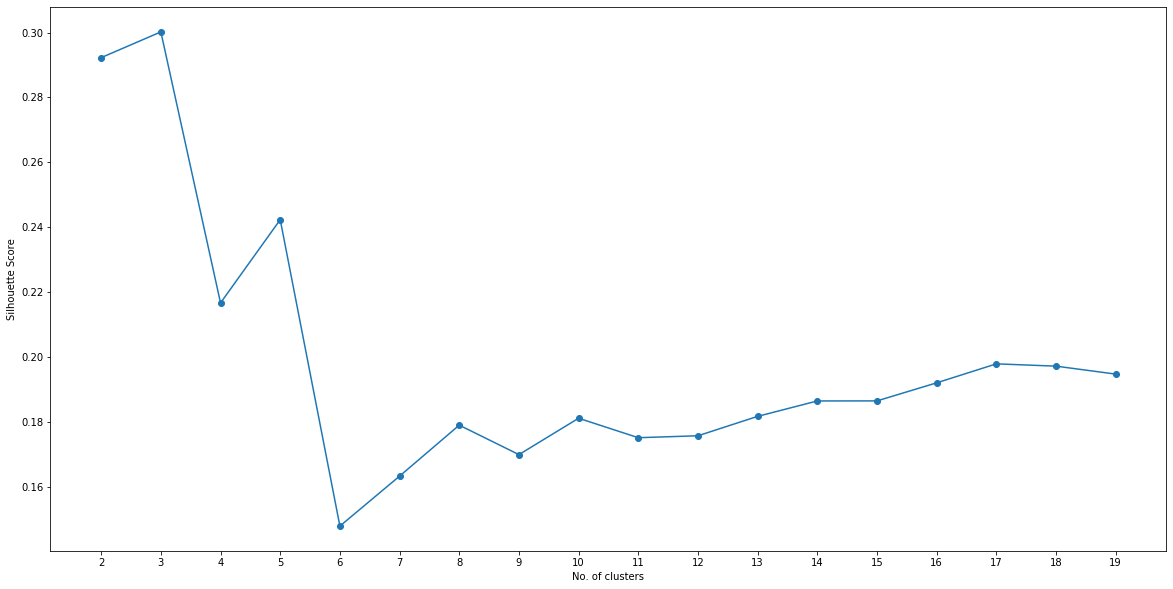

In [54]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [42]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

3

In [55]:
kclusters = 5

# Run k-means clustering
kgc = kolkata_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(kgc)

In [56]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [45]:

kolkata_merged = df
kolkata_merged = kolkata_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
kolkata_merged.dropna(inplace = True)
kolkata_merged['Cluster Labels'] = kolkata_merged['Cluster Labels'].astype(int)
kolkata_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Abhirampur,22.530694,88.346503,1,Dhaba,Hotel,Café,Fast Food Restaurant,Bengali Restaurant,Tea Room,Multiplex,Chinese Restaurant,Shopping Mall,Nightclub,Italian Restaurant,Department Store,Indian Sweet Shop,Vegetarian / Vegan Restaurant,American Restaurant,Indian Restaurant,Gujarati Restaurant,Harbor / Marina,Dessert Shop,Historic Site
1,Agarpara,22.684050,88.391650,2,ATM,Train Station,Pharmacy,Hookah Bar,History Museum,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Discount Store,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food
2,Ajoy Nagar,22.489660,88.396400,1,ATM,Bus Station,Shopping Mall,Bakery,Grocery Store,Multiplex,Department Store,Discount Store,Dumpling Restaurant,Diner,Food,Dhaba,Eastern European Restaurant,Dessert Shop,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food & Drink Shop
3,Alipore,22.526600,88.335100,1,Hotel,Café,South Indian Restaurant,Bakery,Athletics & Sports,Italian Restaurant,Chinese Restaurant,Pizza Place,Dessert Shop,Diner,Discount Store,Food & Drink Shop,Dumpling Restaurant,Dhaba,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market
5,Amtala,22.482678,88.376588,2,ATM,Dessert Shop,Café,Mobile Phone Shop,Dhaba,Department Store,Diner,Discount Store,Food & Drink Shop,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food,Dumpling Restaurant,Food Court,Convenience Store,Harbor / Marina


In [46]:
val = 1
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == (val - 1), kolkata_merged.columns[[0] + np.arange(4, kolkata_merged.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
18,"Balarampur, Budge Budge",ATM,Train Station,Eastern European Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Event Service,Electronics Store,Dumpling Restaurant,Food Court,Discount Store,Diner,Dhaba,Dessert Shop,Department Store,Cricket Ground,Food & Drink Shop,Food Truck,Coffee Shop
19,"Bally, Bally-Jagachha",Train Station,Bus Station,Zoo,Eastern European Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Event Service,Electronics Store,Dumpling Restaurant,Food Court,Discount Store,Diner,Dhaba,Dessert Shop,Department Store,Food & Drink Shop,Food Truck,Convenience Store
20,"Bally, Howrah",Train Station,Bus Station,Zoo,Eastern European Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Event Service,Electronics Store,Dumpling Restaurant,Food Court,Discount Store,Diner,Dhaba,Dessert Shop,Department Store,Food & Drink Shop,Food Truck,Convenience Store
42,Belgachia,Train Station,Metro Station,Park,Bus Station,Dessert Shop,Department Store,Dhaba,Diner,Discount Store,Food & Drink Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Fast Food Restaurant,Field,Flea Market,Food,Zoo,Convenience Store
52,"Bhasa, Bishnupur",Train Station,Zoo,Eastern European Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Event Service,Electronics Store,Dumpling Restaurant,Food Court,Discount Store,Diner,Dhaba,Dessert Shop,Department Store,Cricket Ground,Food & Drink Shop,Food Truck,Coffee Shop
63,"Bishnupur, South 24 Parganas",Train Station,Zoo,Eastern European Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Event Service,Electronics Store,Dumpling Restaurant,Food Court,Discount Store,Diner,Dhaba,Dessert Shop,Department Store,Cricket Ground,Food & Drink Shop,Food Truck,Coffee Shop
153,Jhorhat,ATM,Train Station,Eastern European Restaurant,Food,Flea Market,Field,Fast Food Restaurant,Event Service,Electronics Store,Dumpling Restaurant,Food Court,Discount Store,Diner,Dhaba,Dessert Shop,Department Store,Cricket Ground,Food & Drink Shop,Food Truck,Coffee Shop


In [47]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kolkata_merged['Latitude'], kolkata_merged['Longitude'], kolkata_merged['Neighbourhood'], kolkata_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters